In [ ]:
# survived - 0 means no , 1 means yes
# pclass - class of ticket 1st 2nd or 3rd
# sex - gender
# age - age in years
# sibsp - no of siblings / spouses aboard titanic
# parch - no of parents / children aboard titanic
# ticket - ticket no.
# fare - passenger fare
# cabin - cabin no
# embarked - port of embarkation C = Cherbourg, Q = Queenstown, S = Southampton 

# sibsp: The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# parch: The dataset defines family relations in this way...
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson
# Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
# from gender_submission.csv file we find that only female passengers survive.
# we can check accuracy by test.csv
# it contains the whole data

In [1]:
import matplotlib as plt
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv('train.csv')

In [4]:
print(train.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print(" % of women who survived : " , rate_women)

 % of women who survived :  0.7420382165605095


In [5]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print(" % of men who survived : " , rate_men)

 % of men who survived :  0.18890814558058924


In [4]:
# from this observation we come to know that more women survived from this.
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# RandomForestClassifier is a popular machine learning algorithm used for classification tasks.
# This line extracts the target variable "Survived" from the training data (train_data) and assigns it to the variable y. 
# In supervised learning, "Survived" typically represents whether a passenger survived (1) or not (0) in a Titanic dataset.
#  Here, a list named features is created, containing the names of the features (or independent variables) we want to use for training our model.
# These features include "Pclass" (passenger class), "Sex" (gender), "SibSp" (number of siblings/spouses aboard), and "Parch" (number of parents/children aboard).
# This line creates a DataFrame X containing the features specified in the features list. 
# The pd.get_dummies() function is used to convert categorical variables into dummy/indicator variables. 
# It converts categorical variables like "Sex" into numerical format suitable for machine learning algorithms
# Similar to the previous line, this creates a DataFrame X_test containing the features from the test dataset (test_data).
# It's essential that the same features are used in both the training and test datasets.


from sklearn.ensemble import RandomForestClassifier

Y = train["Survived"]

features = ["Pclass" , "Sex" , "SibSp" , "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state=1)
model.fit(X,Y)
predictions = model.predict(X_test)

output = pd.DataFrame({'passengerId' : test.PassengerId , 'Survived' : predictions})
output.to_csv('submission.csv' , index=False)
print("Your submission was succesfully saved!")

Your submission was succesfully saved!


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Data Cleaning: Check for missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#Age: There are 177 missing values in the Age column. 
# This is a significant portion of the data, and you'll need 
# to decide how to handle these missing values (e.g., imputation, 
# exclusion).

#Cabin: There are 687 missing values in the Cabin column. 
# Since this is a large majority of the data, this column may not
#  be very useful unless you can derive meaningful information 
# from the available values.

#Embarked: There are 2 missing values in the Embarked column. 
# This is a small number, and you can handle these missing values
#  by imputing the most common value or another suitable method.

# Impute missing Age values with median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Drop Cabin column
if 'Cabin' in train.columns:
    train.drop(columns=['Cabin'], inplace=True)

# Fill missing Embarked values with the most common value
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train.isnull().sum()

C:\Users\Devanshi\AppData\Local\Temp\ipykernel_24916\1927828820.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#Survival Rate:
#The mean of Survived is approximately 0.384, indicating that roughly 38.4% of passengers survived.

#Passenger Classes:
#The Pclass column shows that most passengers were in the 3rd class, as the mean is approximately 2.31.

#Age Distribution:
#The ages of passengers range from 0.42 to 80 years, with a mean age of approximately 29.36 years.
#The age distribution can be further analyzed using histograms or boxplots.

#Family Members on Board:
#The SibSp and Parch columns show that most passengers traveled with few or no family members.
#The maximum number of siblings/spouses aboard is 8, and the maximum number of parents/children aboard is 6.

#Fare Prices:
#The Fare column has a wide range, from 0 to 512.33, with a mean fare of approximately 32.20.
#The fare distribution is highly skewed, as indicated by the large difference between the mean and the 75th percentile (31.00) compared to the maximum value.

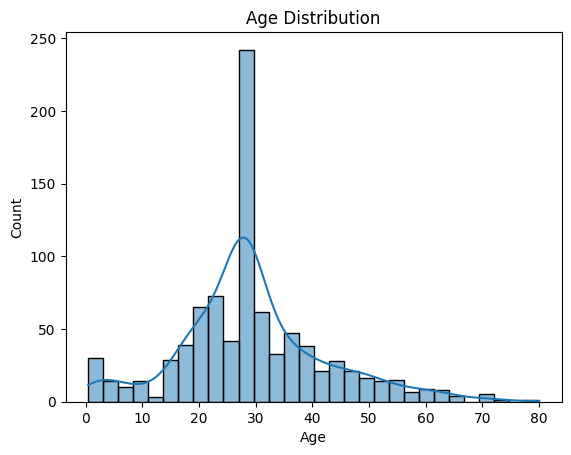

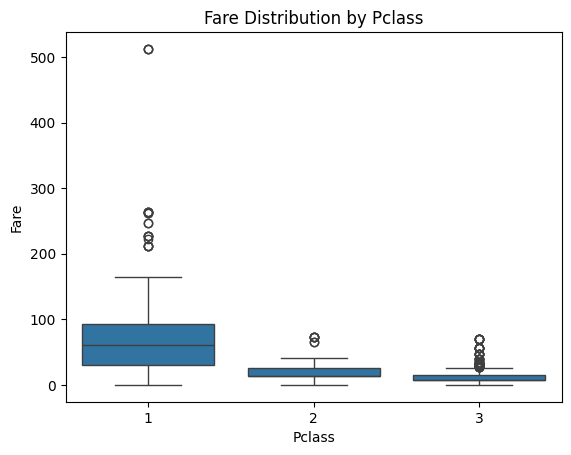

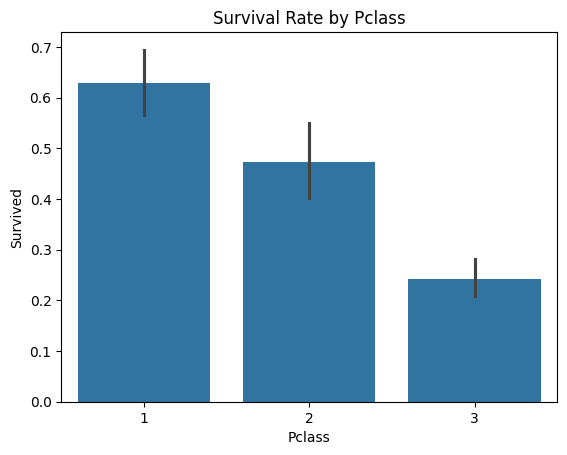

In [19]:
#Use histograms, boxplots, and scatter plots to visualize the distribution of ages, fares, and survival rates across different classes.

import seaborn as sns
import matplotlib.pyplot as plt
# Histogram of Age
sns.histplot(train['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Boxplot of Fare by Pclass
sns.boxplot(x='Pclass', y='Fare', data=train)
plt.title('Fare Distribution by Pclass')
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Pclass')
plt.show()


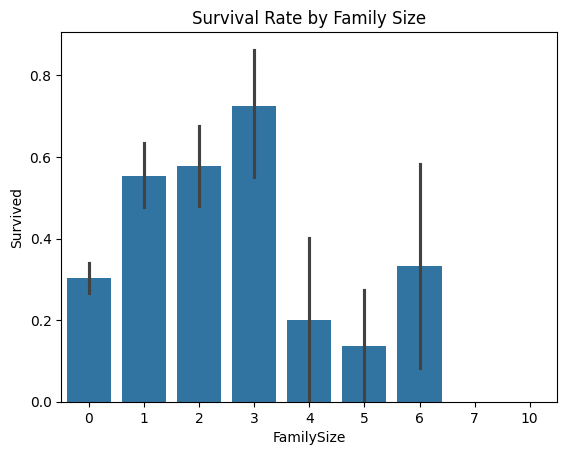

In [22]:
train['FamilySize'] = train['SibSp'] + train['Parch']
sns.barplot(x='FamilySize', y='Survived', data=train)
plt.title('Survival Rate by Family Size')
plt.show()

In [23]:
# Value counts for categorical variables
print(train['Pclass'].value_counts())
print(train['Sex'].value_counts())
print(train['Embarked'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


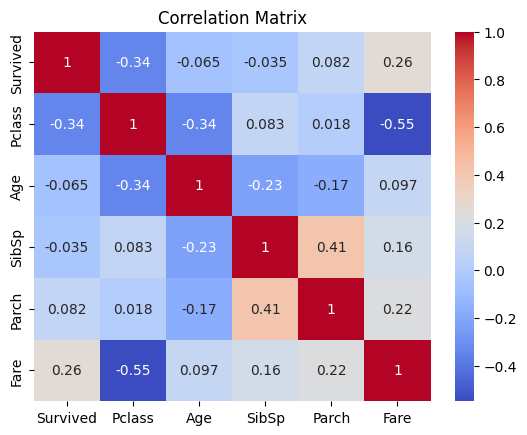

In [25]:
# Drop non-numeric columns that are not relevant for correlation
train_numeric = train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Calculate correlation matrix
corr_matrix = train_numeric.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()